In [20]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.shape

(7043, 21)

In [4]:
df_x = df.drop(columns=['customerID', 'Churn'])
df_y = pd.DataFrame(df['Churn'])

print(df_x.columns)
print(df_y.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Index(['Churn'], dtype='object')


In [5]:
ordinal_enc = OrdinalEncoder()

df_x = ordinal_enc.fit_transform(df_x)
df_y = ordinal_enc.fit_transform(df_y)

In [6]:
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [7]:
x_train_val, x_test, y_train_val, y_test = train_test_split(df_x, df_y, test_size=.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=.2)

### Single Layer Perceptron (SLP)

In [18]:
model_slp = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (x_train.shape[1],), activation='sigmoid')
])

model_slp.compile('adam', metrics=['accuracy'], loss='binary_crossentropy')
model_slp.summary()

Model: "sequential_2"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist_slp = model_slp.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
141/141 [==============================] - 2s 7ms/step - loss: 0.8685 - accuracy: 0.4848 - val_loss: 0.7683 - val_accuracy: 0.5537
Epoch 2/10
141/141 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.5780 - val_loss: 0.6553 - val_accuracy: 0.6353
Epoch 3/10
141/141 [==============================] - 0s 4ms/step - loss: 0.6232 - accuracy: 0.6536 - val_loss: 0.5883 - val_accuracy: 0.6797
Epoch 4/10
141/141 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.7016 - val_loss: 0.5431 - val_accuracy: 0.7205
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5307 - accuracy: 0.7337 - val_loss: 0.5115 - val_accuracy: 0.7480
Epoch 6/10
141/141 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.7539 - val_loss: 0.4890 - val_accuracy: 0.7711
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4846 - accuracy: 0.7661 - val_loss: 0.4724 - val_accuracy: 0.7808
Epoch 

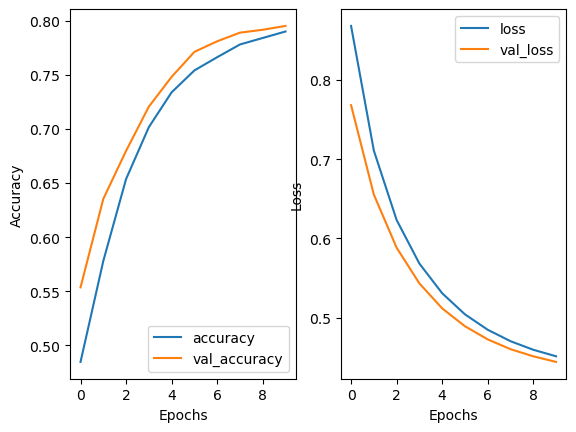

In [29]:
plt.subplot(1, 2, 1)
plt.plot(hist_slp.history['accuracy'])
plt.plot(hist_slp.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

plt.subplot(1, 2, 2)
plt.plot(hist_slp.history['loss'])
plt.plot(hist_slp.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

plt.show()

### Multi Layer Perceptron (MLP)

In [33]:
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape = (x_train.shape[1],)),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mlp.compile('adam', metrics=['accuracy'], loss='binary_crossentropy')
model_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                320       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [34]:
hist_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
141/141 [==============================] - 3s 8ms/step - loss: 0.6086 - accuracy: 0.6832 - val_loss: 0.4481 - val_accuracy: 0.7844
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.7877 - val_loss: 0.4228 - val_accuracy: 0.8004
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4248 - accuracy: 0.7990 - val_loss: 0.4186 - val_accuracy: 0.7977
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4220 - accuracy: 0.7988 - val_loss: 0.4207 - val_accuracy: 0.7968
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.4221 - accuracy: 0.8012 - val_loss: 0.4168 - val_accuracy: 0.8021
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4218 - accuracy: 0.8032 - val_loss: 0.4178 - val_accuracy: 0.8030
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8019 - val_loss: 0.4183 - val_accuracy: 0.7977
Epoch 

In [36]:
loss, accuracy = model_mlp.evaluate(x_test, y_test)

print(loss, accuracy)

45/45 [==============================] - 0s 5ms/step - loss: 0.4163 - accuracy: 0.8027
0.4163118004798889 0.802696943283081


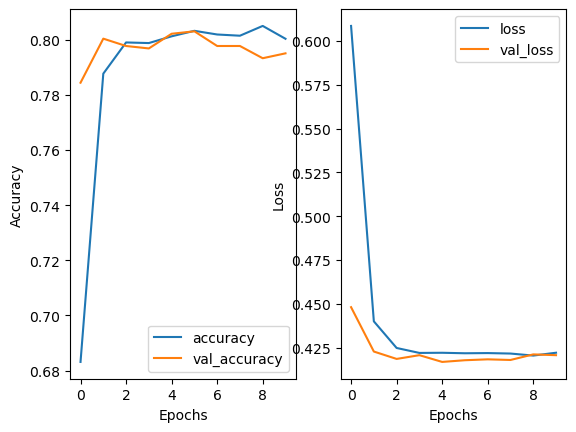

In [35]:
plt.subplot(1, 2, 1)
plt.plot(hist_mlp.history['accuracy'])
plt.plot(hist_mlp.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

plt.subplot(1, 2, 2)
plt.plot(hist_mlp.history['loss'])
plt.plot(hist_mlp.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

plt.show()